# Unveiling Bias: Analyzing Political Sentiment, Emotion, and Sensationalism in Media

In [2]:
import pandas as pd


df = pd.read_csv("hf://datasets/Faith1712/Allsides_political_bias_proper/allsides_data_unstructured.zip")

In [7]:
pd.set_option('display.max_colwidth', 1200)
df.head()

,text,label
0,"Rep. Elijah Cummings, D-Md., speaks during a luncheon at the National Press Club in Washington in August. Patrick Semansky/AP hide caption toggle caption Patrick Semansky/AP Rep. Elijah Cummings, D-Md., speaks during a luncheon at the National Press Club in Washington in August. Patrick Semansky/AP Updated at 11:10 a.m. ET Rep. Elijah E. Cummings, a Baltimore attorney and civil rights advocate who served in Maryland's legislature before representing the state in the U.S. House, where he took on a lead role in investigating President Trump, has died. He was 68. Cummings, the head of the powerful House Committee on Oversight and Reform, died early Thursday at Johns Hopkins Hospital from complications related to longstanding health challenges, according to The Associated Press. ""He worked until his last breath because he believed our democracy was the highest and best expression of our collective humanity and that our nation's diversity was our promise, not our problem,"" said Cummings' wife, Maryland Democratic Par...",1
1,"President Barack Obama narrowly won re-election, overcoming public doubts about his performance on the economy—doubts that challenger Mitt Romney appeared well-positioned to exploit.For Mr. Obama, the victory sets up a test of whether he can forge a productive second term in a divided political system. A review of how President Obama won re-election, including where the balance of power sits in Washington. Photo: Reuters. The U.S. Presidential election was watched closely around the world, perhaps no more so than in Europe. WSJ London Bureau Chief Bruce Orwall joins the News Hub with European-focused foreign policy questions facing Barack Obama. Photo: Getty Images. WSJ Economics Reporter Brian Blackstone joins the News Hub from Germany to discuss the impact of the Presidential election on European financial issues. Photo: Getty Images. ...",1
2,"Infrastructure negotiations between President Biden and a group of Republicans led by Sen. Shelley Moore Capito (R-W.Va.) have officially broken down, and Biden now plans to turn his attention toward striking a deal with a separate, bipartisan group of senators, administration officials said Tuesday night.What we're hearing: When Biden and Capito spoke by phone on Tuesday, the call only lasted a few minutes, and it was clear that the two sides remain too far apart to find a compromise. The two parties still hadn't agreed on how to define what constitutes infrastructure, let alone set a price tag or way to pay for it.What they're saying: Biden ""informed Sen. Capito today that the latest offer from her group did not, in his view, meet the essential needs of our country,"" White House press secretary Jen Psaki said.""He offered his gratitude to her for her efforts and good faith conversations, but expressed his disappointment that, while he was willing to reduce his plan by more than $1 trillion, the Republican group had increased their proposed new investments by only $150 billion.""“While I appreciate President Biden’s willingness to devote so much time and effort to these negotiat...",1
3,"The breakneck pace of hiring slumped in February, a sign that U.S. growth is cooling, though strong wage growth and earlier robust job gains suggest the economy’s near decadelong expansion will endure. U.S. nonfarm payrolls rose a seasonally adjusted 20,000 in February, the Labor Department said Friday, marking the slowest pace for job growth since September 2017—when hurricanes skewed hiring patterns—and falling well below economists’ expectations for 180,000 new jobs. Some of February’s weak job growth might have been a response to strong hiring in previous months. Payrolls grew 311,000 in January and 227,000 in December. The three-month average for job gains clocked in at 186,000, near the average for much of the expansion. The unemployment rate dropped to 3.8% in February from 4% the month before, returning to a level last seen in October. Wages grew at the fas

In [8]:
df.shape

(17362, 2)

Labelling dummies as Left Center and Right

In [10]:
label_map = {0: "Left", 1: "Center", 2: "Right"}
df['label_name'] = df['label'].map(label_map)

In [11]:
df.head()

,text,label,label_name
0,"Rep. Elijah Cummings, D-Md., speaks during a luncheon at the National Press Club in Washington in August. Patrick Semansky/AP hide caption toggle caption Patrick Semansky/AP Rep. Elijah Cummings, D-Md., speaks during a luncheon at the National Press Club in Washington in August. Patrick Semansky/AP Updated at 11:10 a.m. ET Rep. Elijah E. Cummings, a Baltimore attorney and civil rights advocate who served in Maryland's legislature before representing the state in the U.S. House, where he took on a lead role in investigating President Trump, has died. He was 68. Cummings, the head of the powerful House Committee on Oversight and Reform, died early Thursday at Johns Hopkins Hospital from complications related to longstanding health challenges, according to The Associated Press. ""He worked until his last breath because he believed our democracy was the highest and best expression of our collective humanity and that our nation's diversity was our promise, not our problem,"" said Cummings' wife, Maryland Democratic Par...",1,Center
1,"President Barack Obama narrowly won re-election, overcoming public doubts about his performance on the economy—doubts that challenger Mitt Romney appeared well-positioned to exploit.For Mr. Obama, the victory sets up a test of whether he can forge a productive second term in a divided political system. A review of how President Obama won re-election, including where the balance of power sits in Washington. Photo: Reuters. The U.S. Presidential election was watched closely around the world, perhaps no more so than in Europe. WSJ London Bureau Chief Bruce Orwall joins the News Hub with European-focused foreign policy questions facing Barack Obama. Photo: Getty Images. WSJ Economics Reporter Brian Blackstone joins the News Hub from Germany to discuss the impact of the Presidential election on European financial issues. Photo: Getty Images. ...",1,Center
2,"Infrastructure negotiations between President Biden and a group of Republicans led by Sen. Shelley Moore Capito (R-W.Va.) have officially broken down, and Biden now plans to turn his attention toward striking a deal with a separate, bipartisan group of senators, administration officials said Tuesday night.What we're hearing: When Biden and Capito spoke by phone on Tuesday, the call only lasted a few minutes, and it was clear that the two sides remain too far apart to find a compromise. The two parties still hadn't agreed on how to define what constitutes infrastructure, let alone set a price tag or way to pay for it.What they're saying: Biden ""informed Sen. Capito today that the latest offer from her group did not, in his view, meet the essential needs of our country,"" White House press secretary Jen Psaki said.""He offered his gratitude to her for her efforts and good faith conversations, but expressed his disappointment that, while he was willing to reduce his plan by more than $1 trillion, the Republican group had increased their proposed new investments by only $150 billion.""“While I appreciate President Biden’s willingness to devote so much time and effort to these negotiat...",1,Center
3,"The breakneck pace of hiring slumped in February, a sign that U.S. growth is cooling, though strong wage growth and earlier robust job gains suggest the economy’s near decadelong expansion will endure. U.S. nonfarm payrolls rose a seasonally adjusted 20,000 in February, the Labor Department said Friday, marking the slowest pace for job growth since September 2017—when hurricanes skewed hiring patterns—and falling well below economists’ expectations for 180,000 new jobs. Some of February’s weak job growth might have been a response to strong hiring in previous months. Payrolls grew 311,000 in January and 227,000 in December. The three-month average for job gains clocked in at 186,000, near the average for much of the expansion. The unemployment rate dropped to 3.8% in February from 4% the month before, returning to a level last seen i

In [12]:
df.label_name.value_counts()

label_name
Left      7803
Right     5563
Center    3996
Name: count, dtype: int64

Cleaning the article text to remove unnecessary words and characters

In [106]:
import re

def clean_text(text):
    # Convert to lowercase first
    text = text.lower()
     # Remove "hide caption toggle caption" even if there are extra spaces or line breaks between words
    text = re.sub(r'hide\s+caption\s+toggle\s+caption', '', text)

    # Remove "updated at hh:mm a.m./p.m." (handles various times)
    text = re.sub(r'updated at \d{1,2}:\d{2} (a\.m\.|p\.m\.)', '', text)
    # Remove date patterns like "february 15, 2022" or "feb 15, 2022"
    text = re.sub(r'(january|february|march|april|may|june|july|august|september|october|november|december|jan|feb|mar|apr|jun|jul|aug|sep|oct|nov|dec)\s+\d{1,2},\s+\d{4}', '', text)
    # Remove time patterns like "10:48 pm" or "05:41 pm"
    text = re.sub(r'\d{1,2}:\d{2}\s+(am|pm|a\.m\.|p\.m\.)', '', text)
    # Remove patterns like "photo: reuters."
    text = re.sub(r'photo:\s*\w+\.', '', text)
    # Remove patterns like "name/agency" (e.g., "patrick semansky/ap")
    text = re.sub(r'\b\w+\s\w+/\w+\b', '', text)
    text = re.sub(r'\b\w+/[a-z]+\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing spaces
    text = text.strip()
    return text

In [107]:
df['clean_text'] = df['text'].apply(clean_text)

In [108]:
df.head()

,text,label,label_name,clean_text
0,"Rep. Elijah Cummings, D-Md., speaks during a luncheon at the National Press Club in Washington in August. Patrick Semansky/AP hide caption toggle caption Patrick Semansky/AP Rep. Elijah Cummings, D-Md., speaks during a luncheon at the National Press Club in Washington in August. Patrick Semansky/AP Updated at 11:10 a.m. ET Rep. Elijah E. Cummings, a Baltimore attorney and civil rights advocate who served in Maryland's legislature before representing the state in the U.S. House, where he took on a lead role in investigating President Trump, has died. He was 68. Cummings, the head of the powerful House Committee on Oversight and Reform, died early Thursday at Johns Hopkins Hospital from complications related to longstanding health challenges, according to The Associated Press. ""He worked until his last breath because he believed our democracy was the highest and best expression of our collective humanity and that our nation's diversity was our promise, not our problem,"" said Cummings' wife, Maryland Democratic Par...",1,Center,"rep. elijah cummings, d-md., speaks during a luncheon at the national press club in washington in august. rep. elijah cummings, d-md., speaks during a luncheon at the national press club in washington in august. et rep. elijah e. cummings, a baltimore attorney and civil rights advocate who served in maryland's legislature before representing the state in the u.s. house, where he took on a lead role in investigating president trump, has died. he was 68. cummings, the head of the powerful house committee on oversight and reform, died early thursday at johns hopkins hospital from complications related to longstanding health challenges, according to the associated press. ""he worked until his last breath because he believed our democracy was the highest and best expression of our collective humanity and that our nation's diversity was our promise, not our problem,"" said cummings' wife, maryland democratic party chair maya rockeymoore cummings. it's been an honor to walk by his side on this incredible journey. i loved him deeply and will miss him dearly."" house speaker nancy pelosi called cummings ""my brother in baltimore"" as she spoke about him on thursday. ""in the congress, elijah ..."
1,"President Barack Obama narrowly won re-election, overcoming public doubts about his performance on the economy—doubts that challenger Mitt Romney appeared well-positioned to exploit.For Mr. Obama, the victory sets up a test of whether he can forge a productive second term in a divided political system. A review of how President Obama won re-election, including where the balance of power sits in Washington. Photo: Reuters. The U.S. Presidential election was watched closely around the world, perhaps no more so than in Europe. WSJ London Bureau Chief Bruce Orwall joins the News Hub with European-focused foreign policy questions facing Barack Obama. Photo: Getty Images. WSJ Economics Reporter Brian Blackstone joins the News Hub from Germany to discuss the impact of the Presidential election on European financial issues. Photo: Getty Images. ...",1,Center,"president barack obama narrowly won re-election, overcoming public doubts about his performance on the economy—doubts that challenger mitt romney appeared well-positioned to exploit.for mr. obama, the victory sets up a test of whether he can forge a productive second term in a divided political system. a review of how president obama won re-election, including where the balance of power sits in washington. the u.s. presidential election was watched closely around the world, perhaps no more so than in europe. wsj london bureau chief bruce orwall joins the news hub with european-focused foreign policy questions facing barack obama. photo: getty images. wsj economics reporter brian blackstone joins the news hub from germany to discuss the impact of the presidential election on european financial issues. photo: getty images. wsj beijing 

# Emotion Scoring Based on Intensity in Article Text

To analyze the emotional tone of political articles, I scored six primary emotions — **sadness**, **joy**, **love**, **anger**, **fear**, and **surprise** — based on their intensity in the article text.

- **Model Used**:  
  I utilized the [`distilbert-base-uncased-emotion`](https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion) model for initial scoring. This model predicts the intensity of six core emotions.

- **Sample Size**:  
  A 40% random sample of the dataset was used for inference to balance performance and computational cost.

- **Alternative Model Tried**:  
  I also experimented with [`roberta-base-go_emotions`](https://huggingface.co/monologg/roberta-base-go_emotions), which outputs 28 distinct emotion classes, including nuanced emotional states beyond the basic six.

- **Post-Processing**:  
  After obtaining prediction scores, I grouped the data by **political leaning** and calculated the **mean score for each emotion label**. This enabled a comparative analysis of emotional expression across political orientations.


In [64]:
from transformers import AutoTokenizer

# 1. Get the tokenizer for the model
tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

# 2. Function to truncate text to max 450 tokens (safe margin below 512)
def truncate_text(text):
    # Truncate to 450 tokens to be safely under the limit
    return tokenizer.decode(
        tokenizer.encode(text, truncation=True, max_length=500),
        skip_special_tokens=True
    )

In [110]:
from sklearn.model_selection import train_test_split

sample_df, _ = train_test_split(df, train_size=0.4, stratify=df["label_name"], random_state=42)


In [111]:
sample_df.label_name.value_counts()

label_name
Left      3121
Right     2225
Center    1598
Name: count, dtype: int64

In [112]:
classifier = pipeline(
    "text-classification",
    model="bhadresh-savani/distilbert-base-uncased-emotion",
    return_all_scores=True
)


c:\Users\mudas\anaconda3\envs\tf_env\lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [113]:
results = sample_df['clean_text'].apply(truncate_text).apply(lambda x: classifier(x)[0])


In [114]:
# Extract scores into a new DataFrame
scores_df = pd.DataFrame(
    results.apply(lambda x: {d['label']: d['score'] for d in x}).tolist()
)

# Combine with original DataFrame
final_df = pd.concat([sample_df, scores_df], axis=1)


In [115]:
# Reset index to align both DataFrames
sample_df_reset = sample_df.reset_index(drop=True)
scores_df_reset = scores_df.reset_index(drop=True)

# Concatenate the two DataFrames
final_df = pd.concat([sample_df_reset, scores_df_reset], axis=1)


In [116]:
final_df.head()

,text,label,label_name,clean_text,sadness,joy,love,anger,fear,surprise
0,"The Centers for Disease Control and Prevention (CDC) released a report Friday detailing a recent COVID-19 outbreak in Provincetown, Massachusetts, which was cited by the agency as a contributing factor to its recent change in mask guidance.Over the July 4 weekend, gatherings in Provincetown contributed to at least 900 cases, and roughly 75% of those who tested positive in the cluster were vaccinated. The Provincetown report concludes that spread among highly-vaccinated populations does occur and suggests that authorities reimplement mask mandates and other mitigation measures, even for the vaccinated. The Provincetown report was a major warning sign for CDC officials, who earlier this week reversed course and once again recommended that vaccinated Americans wear face coverings in some indoor settings. A leaked internal document from the CDC included preliminary data from the Provincetown outbreak in its summary of information on breakthrough cases of the delta variant. The vaccines are working. Of the 900 cases related to the Provincetown cluster, there have been no deaths, 7 hospitalizations, and the symptoms are largely mild. Our positivity peaked at 15% on 7/15 and was only ...",2,Right,"the centers for disease control and prevention (cdc) released a report friday detailing a recent covid-19 outbreak in provincetown, massachusetts, which was cited by the agency as a contributing factor to its recent change in mask guidance.over the july 4 weekend, gatherings in provincetown contributed to at least 900 cases, and roughly 75% of those who tested positive in the cluster were vaccinated. the provincetown report concludes that spread among highly-vaccinated populations does occur and suggests that authorities reimplement mask mandates and other mitigation measures, even for the vaccinated. the provincetown report was a major warning sign for cdc officials, who earlier this week reversed course and once again recommended that vaccinated americans wear face coverings in some indoor settings. a leaked internal document from the cdc included preliminary data from the provincetown outbreak in its summary of information on breakthrough cases of the delta variant. the vaccines are working. of the 900 cases related to the provincetown cluster, there have been no deaths, 7 hospitalizations, and the symptoms are largely mild. our positivity peaked at 15% and was only 4.8% yes...",0.014373,0.141423,0.002109,0.026873,0.812825,0.002396
1,"The attorney for the former Port Authority official at the center of the George Washington Bridge scandal said there is evidence showing that New Jersey Gov. Chris Christie was aware of the lane closures when they happened. Alan L. Zegas, who is representing David Wildstein, the official who ordered the lane closures and resigned as a result last year, said in a letter to the legal counsel for the Port Authority that there is evidence “tying Mr. Christie to having knowledge of the lane closures, during the period when the lanes were closed, contrary to what the Governor stated publicly.” “Mr. Wildstein contests the accuracy of various statements that the Governor made about him and he can prove the inaccuracy of some,” said the attorney, Alan L. Zegas. ...",2,Right,"the attorney for the former port authority official at the center of the george washington bridge scandal said there is evidence showing that new jersey gov. chris christie was aware of the lane closures when they happened. alan l. zegas, who is representing david wildstein, the official who ordered the lane closures and resigned as a result last year, said in a letter to the legal counsel for the port authority that there is evidence “tying mr. christie to having knowledge of the lane closures, during the period when the lanes were closed, contrary to what the governor stated publicly.” “mr. wildstein contests the accuracy of various statements that the governor made abou

Emotion scores for Left, Center and Right

In [117]:
# Step 1: Melt the final_df to separate emotion scores into rows
melted_df = final_df.melt(id_vars=['label_name'], value_vars=scores_df_reset.columns, 
                          var_name='emotion', value_name='score')

# Step 2: Group by 'label_name' and 'emotion' to calculate the average score
grouped_df = melted_df.groupby(['label_name', 'emotion'], as_index=False)['score'].mean()

# Step 3: Pivot the grouped DataFrame to have emotions as columns
pivoted_df = grouped_df.pivot(index='label_name', columns='emotion', values='score')

# Step 4: Reset the index to make 'label_name' a column
pivoted_df.reset_index(inplace=True)

# View the result
pivoted_df.head()


emotion,label_name,anger,fear,joy,love,sadness,surprise
0,Center,0.555122,0.134222,0.215239,0.006213,0.087113,0.002091
1,Left,0.562111,0.129473,0.210707,0.007226,0.085093,0.005392
2,Right,0.553004,0.133339,0.222702,0.006010,0.081929,0.003016


# Sentiment Analysis

I performed sentiment analysis using the [`twitter-roberta-base-sentiment`](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment) model on the same 40% sample to understand the average sentiment associated with each political leaning.

- **Model Used**:  
  [`twitter-roberta-base-sentiment`](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment) — a model trained on Twitter data to classify sentiment as **positive**, **neutral**, or **negative**.

- **Sample Size**:  
  A 40% random sample of the dataset was used, consistent with the emotion analysis for comparability.

- **Normalization**:  
  Sentiment scores were normalized on a scale from **-1 (negative)** to **+1 (positive)** to allow for intuitive interpretation and aggregation.

- **Post-Processing**:  
  After scoring, the data was grouped by **political leaning**, and the **average sentiment score** was calculated for each group. This enabled a comparative view of sentiment trends across political ideologies.


In [118]:

import numpy as np

# Text processing
import re
from tqdm import tqdm  # For progress bars

# Machine learning and model related
from transformers import pipeline, AutoTokenizer
from sklearn.model_selection import train_test_split

In [119]:
def get_transformer_sentiment(texts, model_name="cardiffnlp/twitter-roberta-base-sentiment"):
    # Load tokenizer and pipeline
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)
    max_length = 512

    # Truncate each text by tokens
    truncated_texts = []
    for text in texts:
        # Tokenize and truncate
        tokens = tokenizer.encode(str(text), max_length=max_length, truncation=True)
        # Decode back to string
        truncated_text = tokenizer.decode(tokens, skip_special_tokens=True)
        truncated_texts.append(truncated_text)

    results = sentiment_pipeline(truncated_texts)
    return [r['score'] if r['label'] == 'POSITIVE' else -r['score'] for r in results]


In [120]:
sample_df_reset['sentiment_score'] = get_transformer_sentiment(sample_df_reset['clean_text'])

In [121]:
sample_df_reset.head(3)

,text,label,label_name,clean_text,sentiment_score
0,"The Centers for Disease Control and Prevention (CDC) released a report Friday detailing a recent COVID-19 outbreak in Provincetown, Massachusetts, which was cited by the agency as a contributing factor to its recent change in mask guidance.Over the July 4 weekend, gatherings in Provincetown contributed to at least 900 cases, and roughly 75% of those who tested positive in the cluster were vaccinated. The Provincetown report concludes that spread among highly-vaccinated populations does occur and suggests that authorities reimplement mask mandates and other mitigation measures, even for the vaccinated. The Provincetown report was a major warning sign for CDC officials, who earlier this week reversed course and once again recommended that vaccinated Americans wear face coverings in some indoor settings. A leaked internal document from the CDC included preliminary data from the Provincetown outbreak in its summary of information on breakthrough cases of the delta variant. The vaccines are working. Of the 900 cases related to the Provincetown cluster, there have been no deaths, 7 hospitalizations, and the symptoms are largely mild. Our positivity peaked at 15% on 7/15 and was only ...",2,Right,"the centers for disease control and prevention (cdc) released a report friday detailing a recent covid-19 outbreak in provincetown, massachusetts, which was cited by the agency as a contributing factor to its recent change in mask guidance.over the july 4 weekend, gatherings in provincetown contributed to at least 900 cases, and roughly 75% of those who tested positive in the cluster were vaccinated. the provincetown report concludes that spread among highly-vaccinated populations does occur and suggests that authorities reimplement mask mandates and other mitigation measures, even for the vaccinated. the provincetown report was a major warning sign for cdc officials, who earlier this week reversed course and once again recommended that vaccinated americans wear face coverings in some indoor settings. a leaked internal document from the cdc included preliminary data from the provincetown outbreak in its summary of information on breakthrough cases of the delta variant. the vaccines are working. of the 900 cases related to the provincetown cluster, there have been no deaths, 7 hospitalizations, and the symptoms are largely mild. our positivity peaked at 15% and was only 4.8% yes...",-0.660263
1,"The attorney for the former Port Authority official at the center of the George Washington Bridge scandal said there is evidence showing that New Jersey Gov. Chris Christie was aware of the lane closures when they happened. Alan L. Zegas, who is representing David Wildstein, the official who ordered the lane closures and resigned as a result last year, said in a letter to the legal counsel for the Port Authority that there is evidence “tying Mr. Christie to having knowledge of the lane closures, during the period when the lanes were closed, contrary to what the Governor stated publicly.” “Mr. Wildstein contests the accuracy of various statements that the Governor made about him and he can prove the inaccuracy of some,” said the attorney, Alan L. Zegas. ...",2,Right,"the attorney for the former port authority official at the center of the george washington bridge scandal said there is evidence showing that new jersey gov. chris christie was aware of the lane closures when they happened. alan l. zegas, who is representing david wildstein, the official who ordered the lane closures and resigned as a result last year, said in a letter to the legal counsel for the port authority that there is evidence “tying mr. christie to having knowledge of the lane closures, during the period when the lanes were closed, contrary to what the governor stated publicly.” “mr. wildstein contests the accuracy of various statements that the governor made about him and he can prove the inaccuracy of some,” said the attorney

In [122]:
# Calculate mean sentiment scores by label_name
mean_sentiments = sample_df_reset.groupby('label_name')['sentiment_score'].mean()

# Display the results
print("Mean Sentiment Scores by Political Bias:")
print("\n", mean_sentiments)


Mean Sentiment Scores by Political Bias:

 label_name
Center   -0.605141
Left     -0.597125
Right    -0.601080
Name: sentiment_score, dtype: float64


#### Violin Plot to show distribution

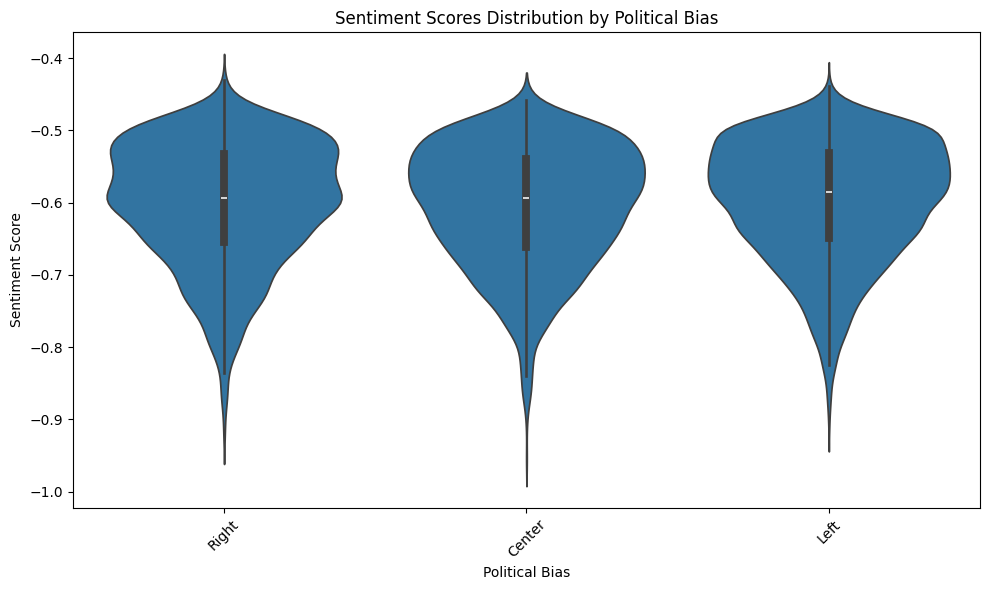

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x=sample_df_reset['label_name'], y=sample_df_reset['sentiment_score'])
plt.title('Sentiment Scores Distribution by Political Bias')
plt.xlabel('Political Bias')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusion: Sentiment Analysis by Political Bias

The violin plot above illustrates the distribution of normalized sentiment scores across different political leanings — **Left**, **Center**, and **Right**. All three groups display a negative average sentiment, with the majority of scores clustering between **-0.5 and -0.7**.

#### Mean Sentiment Scores:
- **Center**: -0.605  
- **Left**: -0.597  
- **Right**: -0.601  

#### Key Insights:
- **Overall negativity**: Articles across all political biases tend to carry a predominantly negative tone.
- **Slight variation**: The **Left-leaning** articles exhibit marginally less negativity on average compared to Center and Right, though the differences are not large enough to indicate any stark contrast.
- **Consistency**: The sentiment spread and central tendency are relatively uniform, suggesting that emotional framing in political content may be a generalized trait rather than highly polarized across biases.

This suggests that while political bias influences emotional tone (as seen in emotion classification), sentiment — especially negativity — is consistently present across the spectrum.


In [124]:
import pickle

# Specify what variables you want to save
data_to_save = {}
# Add your variables to the dictionary
data_to_save['sample_df_reset'] = sample_df_reset
data_to_save['df'] = df
data_to_save['final_df'] = final_df
data_to_save['pivoted_df'] = pivoted_df
data_to_save['mean_sentiments'] = mean_sentiments
# Save to pickle file
output_path = 'projectfiles.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(data_to_save, f)

print(f'Progress saved to {output_path}')

Progress saved to projectfiles.pkl


# Sensationalism Labeling using GPT-3.5 Turbo

To evaluate the presence of sensationalism in political articles, I used **OpenAI’s GPT-3.5 Turbo** model with a carefully designed prompt for binary classification: *sensationalistic* vs *not sensationalistic*.

- **Sample Size**:  
  A 10% sample of the dataset was selected to manage token limits and reduce cost.

- **Token Constraint**:  
  Each article was truncated or summarized to fit within a **1024-token** input limit.

- **Prompting and Parameters**:  
  I used an appropriate prompting strategy to ensure consistent interpretation. The **temperature was set to 0.0** to ensure deterministic responses and eliminate randomness in classification.

- **Post-Processing**:  
  The results were grouped by **political leaning**, and I counted the number of articles labeled as sensationalistic versus not.  
  I then calculated the **proportion of sensationalistic articles** for each political bias, enabling a comparative analysis.

This analysis allows us to explore whether certain political leanings exhibit a higher tendency toward sensationalism in their article narratives.


In [125]:
sample_df2, _ = train_test_split(df, train_size=0.1, stratify=df["label_name"], random_state=42)

In [126]:
# 1. Local tokenizer-based truncation
def truncate_text_to_tokens(text: str,
                            max_tokens: int = 1024,
                            model_name: str = "gpt-4-turbo") -> str:
    # get the right encoding for the model
    enc = tiktoken.encoding_for_model(model_name)
    token_ids = enc.encode(text)
    
    # truncate if too long
    if len(token_ids) > max_tokens:
        token_ids = token_ids[:max_tokens]
    
    return enc.decode(token_ids)

In [128]:
!pip install openai tiktoken 


  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/661.2 kB ? eta -:--:--
   --------------- ------------------------ 262.1/661.2 kB ? eta -:--:--
   ---------------------------------------- 661.2/661.2 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/798.9 kB ? eta -:--:--
   -------------------------- ------------- 524.3/798.9 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 798.9/798.9 kB 3.1 MB/s eta 0:00:00
Using cached distro-1.9.0-py3-none-any.whl (20 kB)


In [137]:
import os
import openai
import tiktoken




openai.api_key = "YOUR_API_KEY"

def label_sensationalism(article_text: str) -> str:
    # first, ensure we don't exceed token limit
    truncated = truncate_text_to_tokens(article_text, max_tokens=1024)
    
    prompt = f"""
You are an expert news analyst.
Determine if the following article is "Sensationalist" or "Not Sensationalist".
Sensationalist articles use exaggerated, emotional, or shocking language.

Article:
---
{truncated}
---

Answer only with "Sensationalist" or "Not Sensationalist"."""
    
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.0,
        max_tokens=10
    )

    
    return response.choices[0].message.content.strip()



In [138]:
article = "Breaking news! Massive fire destroys entire city block, leaving hundreds in tears!"
print(label_sensationalism(article))

Sensationalist


In [139]:
# Apply the labeling function to each row in the DataFrame
sample_df2['sensationalism_label'] = sample_df2['clean_text'].apply(label_sensationalism)

# View the updated DataFrame
sample_df2


,text,label,label_name,clean_text,sensationalism_label
7606,"Updated on: March 23, 2018 / 10:53 AM / CBS News House passes $1.3T spending bill House passes $1.3T spending bill 07:26 President Trump is threatening to veto the omnibus spending bill the Senate passed overnight — despite indicating support for it in the last two days — because he says it doesn't protect Dreamers or fully fund his border wall. The president's veto threat suddenly makes a government shutdown, which seemed to be a crisis averted early Friday morning, much more likely. Government funding runs out at midnight. If he follows through, this would be Mr. Trump's first veto since taking office. I am considering a VETO of the Omnibus Spending Bill based on the fact that the 800,000 plus DACA recipients have been totally abandoned by the Democrats (not even mentioned in Bill) and the BORDER WALL, which is desperately needed for our National Defense, is not fully funded.— Donald J. Trump (@realDonaldTrump) March 23, 2018 The White House insisted repeatedly Thursday that even though the legislation didn't fund Mr. Trum...",0,Left,"updated on: / / cbs news house passes $1.3t spending bill house passes $1.3t spending bill 07:26 president trump is threatening to veto the omnibus spending bill the senate passed overnight — despite indicating support for it in the last two days — because he says it doesn't protect dreamers or fully fund his border wall. the president's veto threat suddenly makes a government shutdown, which seemed to be a crisis averted early friday morning, much more likely. government funding runs out at midnight. if he follows through, this would be mr. trump's first veto since taking office. i am considering a veto of the omnibus spending bill based on the fact that the 800,000 plus daca recipients have been totally abandoned by the democrats (not even mentioned in bill) and the border wall, which is desperately needed for our national defense, is not fully funded.— donald j. trump (@realdonaldtrump) the white house insisted repeatedly thursday that even though the legislation didn't fund mr. trump's border wall — the president has requested $25 billion and the legislation only provides about $1.6 billion — that the president still supported the bill. on thursday afternoon, office of mana...",Not Sensationalist
17147,"The first State of the Union address of President Obama’s second term is shaping up as a conservative’s nightmare come true. In his speech to Congress on Tuesday night, Mr. Obama is certain to demand more tax revenue, part of his “balanced” approach to deficit reduction, even though he won a battle with Congress last month for a tax increase on wealthier households. He also will push for more spending to fund his job-creation proposals and education plans. The nationally televised address will begin at 9 p.m. (SEE RELATED: Ted Nugent to be a guest at State of the Union address) “He will focus on the pro...",2,Right,"the first state of the union address of president obama’s second term is shaping up as a conservative’s nightmare come true. in his speech to congress on tuesday night, mr. obama is certain to demand more tax revenue, part of his “balanced” approach to deficit reduction, even though he won a battle with congress last month for a tax increase on wealthier households. he also will push for more spending to fund his job-creation proposals and education plans. the nationally televised address will begin at 9 p.m. (see related: ted nugent to be a guest at state of the union address) “he will focus on the proposals that are necessary to help the middle class grow and help the economy grow,” white house press secretary jay carney said monday. “we need more investment that helps the key industries of the 21st century take root here in the united states. we are not done, not even close.” along with higher taxes and bigger government, mr. obama will renew his call for gun-control measures and immigration reform that includes a pa

In [140]:
import pickle

# Specify what variables you want to save
data_to_save = {}
# Add your variables to the dictionary
data_to_save['sample_df_reset'] = sample_df_reset
data_to_save['df'] = df
data_to_save['final_df'] = final_df
data_to_save['pivoted_df'] = pivoted_df
data_to_save['mean_sentiments'] = mean_sentiments
data_to_save['sample_df2'] = sample_df2
# Save to pickle file
output_path = 'projectfiles.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(data_to_save, f)

print(f'Progress saved to {output_path}')

Progress saved to projectfiles.pkl


In [145]:

sample_df2.sensationalism_label.value_counts()

sensationalism_label
Not Sensationalist    1552
Sensationalist         184
Name: count, dtype: int64

In [ ]:
# Get counts 
counts = (
    sample_df2
    .groupby(['label_name', 'sensationalism_label'])
    .size()
    .unstack(fill_value=0)
)

# Divide by row sum to get proportions
props = counts.div(counts.sum(axis=1), axis=0)

print(props)



sensationalism_label  Not Sensationalist  Sensationalist
label_name                                              
Center                          0.957500        0.042500
Left                            0.920513        0.079487
Right                           0.811151        0.188849


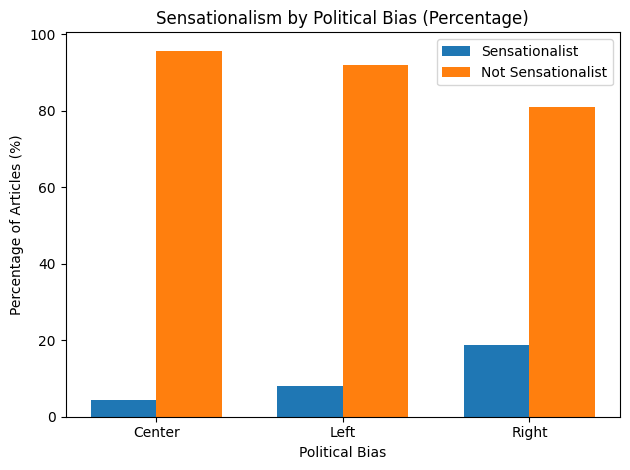

In [144]:
# 1. Compute the counts
counts = sample_df2.groupby(
    ['label_name', 'sensationalism_label']
).size().unstack(fill_value=0)

# 2. Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 3. Prepare data for plotting
labels = percentages.index.tolist()
sens_pct = percentages['Sensationalist'].tolist()
not_sens_pct = percentages['Not Sensationalist'].tolist()
x = range(len(labels))
width = 0.35

# 4. Create the bar chart
fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], sens_pct, width)
ax.bar([i + width/2 for i in x], not_sens_pct, width)

# 5. Formatting
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Political Bias')
ax.set_ylabel('Percentage of Articles (%)')
ax.set_title('Sensationalism by Political Bias (Percentage)')
ax.legend(['Sensationalist', 'Not Sensationalist'])
plt.tight_layout()

# 6. Show
plt.show()


### Conclusion: Sensationalism by Political Bias

**Right-leaning articles are almost **4.5×** more likely to be sensationalistic than center-leaning ones**—with **18.9%** of right-leaning content labeled sensationalist versus just **4.25%** for center-leaning. This dramatic gap suggests that sensationalism is a key differentiator in how ideological perspectives engage and influence their audiences.

The analysis of sensationalism across political leanings reveals notable differences in the proportion of sensationalistic content.

#### Proportion of Sensationalist Articles:
- **Center**: 4.25%
- **Left**: 7.95%
- **Right**: 18.88%

#### Key Insights:
- **Right-leaning articles** show a significantly higher proportion of sensationalistic content compared to Center and Left. Nearly **1 in 5** articles from right-leaning sources were labeled sensationalist.
- **Center-leaning articles** have the **lowest incidence**, with over **95%** of content classified as non-sensational.
- **Left-leaning articles** fall in between, showing a moderate level of sensationalism.

This suggests that the degree of sensationalism in political reporting may correlate with ideological leaning, with **right-leaning media more likely to employ sensationalistic language or framing**.




# Emotion Analysis using GPT-3.5 Turbo

To cross-validate emotional tone classifications and compare with earlier model-based results, I performed another round of **emotion classification** using **OpenAI’s GPT-3.5 Turbo**.

- **Sample Size and Token Limit**:  
  A **10% sample** of articles was selected, with each input capped at **1024 tokens** to ensure compatibility with the model and maintain cost-efficiency.

- **Prompting Strategy**:  
  I used a carefully crafted prompt to extract scores for the same six emotions as before:  
  **sadness, joy, love, anger, fear, and surprise**, ensuring direct comparability with the `distilbert-base-uncased-emotion` model.

- **Model Parameters**:  
  The **temperature was set to 0.0** to maintain deterministic outputs and ensure consistent scoring.

- **Post-Processing**:  
  Emotion scores were extracted from the model responses for each text.  
  These were then **grouped by political leaning**, and the **mean score for each emotion** was calculated to observe patterns across ideological categories.

This approach provided an interpretable, LLM-generated emotional profile of articles, useful for comparison against traditional emotion classification models.
 

In [148]:
def score_emotions(text):
    # first, ensure we don't exceed token limit
    truncated = truncate_text_to_tokens(text, max_tokens=1024)
    prompt = f"""
You are an expert in affective computing and emotion analysis.

Given the article below, score the intensity of each emotion on a scale of 0 to 1.
Emotions: anger, fear, joy, love, sadness, surprise

Text:
\"\"\"{truncated}\"\"\"

Respond only in JSON format like:
{{"anger": 0.2, "fear": 0.5, "joy": 0.1, "love": 0.0, "sadness": 0.7, "surprise": 0.4}}
"""

    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=100,
        )

        content = response.choices[0].message.content.strip()
        scores = eval(content)  # Caution: If unsure, use json.loads()
        return scores

    except Exception as e:
        print("Error:", e)
        return {"anger": None, "fear": None, "joy": None, "love": None, "sadness": None, "surprise": None}


In [149]:
# Apply and expand emotion scores into separate columns
emotion_scores_df = sample_df2['clean_text'].apply(score_emotions).apply(pd.Series)


In [151]:
# Group by label_name and calculate average of emotion scores
grouped_emotions = sample_df2.groupby("label_name")[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].mean().reset_index()

# Optional: Add a placeholder 'emotion' column to match your desired format
grouped_emotions.insert(0, 'emotion', range(len(grouped_emotions)))

# Show final DataFrame
print(grouped_emotions)


   emotion label_name     anger      fear       joy      love   sadness  \
0        0     Center  0.325500  0.443750  0.098500  0.015250  0.684750   
1        1       Left  0.352051  0.424231  0.096923  0.016026  0.698333   
2        2      Right  0.385971  0.414568  0.089029  0.012590  0.698201   

   surprise  
0  0.303500  
1  0.314487  
2  0.307734  


In [153]:
grouped_emotions

,emotion,label_name,anger,fear,joy,love,sadness,surprise
0,0,Center,0.325500,0.443750,0.098500,0.015250,0.684750,0.303500
1,1,Left,0.352051,0.424231,0.096923,0.016026,0.698333,0.314487
2,2,Right,0.385971,0.414568,0.089029,0.012590,0.698201,0.307734


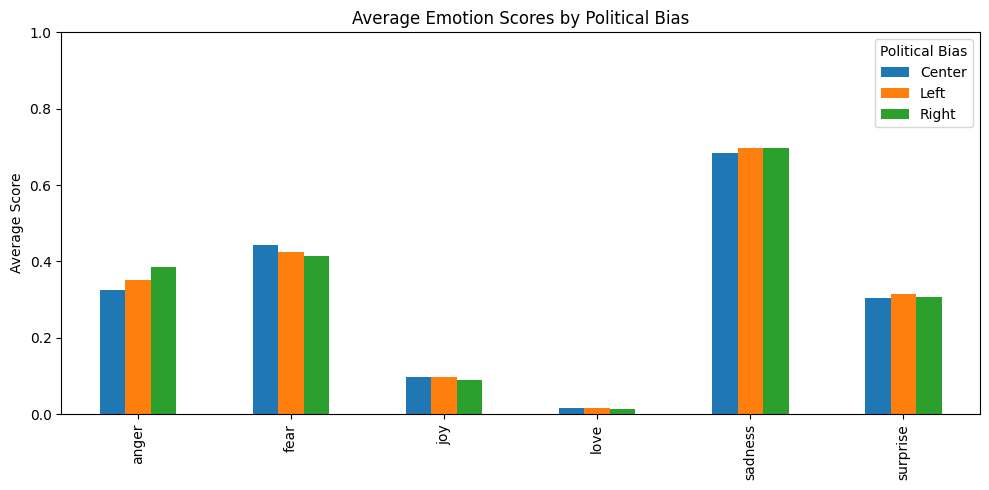

In [152]:
# Transpose the DataFrame for better grouped barplot visualization
grouped_emotions_plot = grouped_emotions.set_index('label_name').T.drop('emotion')

# Plot
grouped_emotions_plot.plot(kind='bar', figsize=(10, 5))
plt.title("Average Emotion Scores by Political Bias")
plt.ylabel("Average Score")
plt.ylim(0, 1)
plt.legend(title='Political Bias')
plt.tight_layout()
plt.show()


### Conclusion: Emotion Analysis using GPT-3.5 Turbo

The emotion classification results show consistent patterns across political leanings, with subtle yet meaningful differences in emotional tone.

#### Key Insights:
- **Anger and Sadness** are highest in **right-leaning** articles, continuing the trend seen in model-based classification.
- **Fear** is slightly more dominant in **center-leaning** articles.
- **Joy and Love** scores remain low across the board, but are marginally higher in center and left-leaning texts.
- **Surprise** levels are fairly balanced, with a slight edge in **left-leaning** content.

These results suggest that **negative emotions (anger, fear, sadness)** dominate across all political segments, but are most pronounced in **right-leaning** content. This emotional landscape mirrors the sentiment and sensationalism findings, reinforcing the emotional framing tendencies across the political spectrum.


## Comparative Analysis: DistilBERT vs GPT-3.5 Turbo Emotion Classification

To better understand how different models interpret emotional tone across political biases, I compared the average emotion scores from two methods:

- **DistilBERT-based model** (`distilbert-base-uncased-emotion`)
- **GPT-3.5 Turbo** (with structured prompting and deterministic output)

#### Comparison Table: Mean Emotion Scores by Political Bias

| Emotion   | Model        | Center | Left   | Right  |
|-----------|--------------|--------|--------|--------|
| **Anger**     | DistilBERT     | **0.555**  | **0.562**  | **0.553**  |
|               | GPT-3.5 Turbo  | 0.326  | 0.352  | **0.386**  |
| **Fear**      | DistilBERT     | 0.134  | 0.129  | 0.133  |
|               | GPT-3.5 Turbo  | **0.444**  | 0.424  | 0.415  |
| **Joy**       | DistilBERT     | **0.215**  | **0.211**  | **0.223**  |
|               | GPT-3.5 Turbo  | 0.099  | 0.097  | 0.089  |
| **Love**      | DistilBERT     | 0.0062 | 0.0072 | 0.0060 |
|               | GPT-3.5 Turbo  | **0.0153** | **0.0160** | 0.0126 |
| **Sadness**   | DistilBERT     | 0.087  | 0.085  | 0.082  |
|               | GPT-3.5 Turbo  | **0.685**  | **0.698**  | **0.698**  |
| **Surprise**  | DistilBERT     | 0.0021 | 0.0054 | 0.0030 |
|               | GPT-3.5 Turbo  | **0.304**  | **0.314**  | **0.308**  |

---

#### Key Insights:

- **DistilBERT** generally outputs **lower scores** for emotions across the board, suggesting a more conservative intensity scale.
- **GPT-3.5 Turbo** scores **negative emotions (fear, sadness, anger)** much higher, indicating it interprets content as more emotionally charged.
- **Joy** and **Love** are consistently low in both models, but **GPT assigns even lower joy**, especially to **right-leaning** content.
- **Surprise** sees a drastic divergence: GPT scores it significantly higher across all groups, while DistilBERT barely detects it.

#### Interpretability Implications:
- The **GPT-based approach** may capture **contextual emotional nuance** better due to its generative nature and broader world knowledge.
- The **DistilBERT-based method** is more **statistical and token-sensitive**, resulting in lower, flatter emotion scores.

Overall, while both models agree on the **emotional valence** (e.g., more anger and sadness in right-leaning articles), GPT suggests a **more emotionally intense media landscape**.


In [172]:

# Specify what variables you want to save
data_to_save = {}
# Add your variables to the dictionary
data_to_save['sample_df_reset'] = sample_df_reset
data_to_save['df'] = df
data_to_save['final_df'] = final_df
data_to_save['pivoted_df'] = pivoted_df
data_to_save['mean_sentiments'] = mean_sentiments
data_to_save['sample_df2'] = sample_df2
data_to_save['grouped_emotions']= grouped_emotions
# Save to pickle file
output_path = 'projectfiles.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(data_to_save, f)

print(f'Progress saved to {output_path}')

Progress saved to projectfiles.pkl


# Article Generation in Different Political Styles

To explore political framing and narrative transformation, I used **GPT-3.5 Turbo** to generate **left-leaning versions of right-leaning articles**.

#### Methodology:
- **Model Used**: GPT-3.5 Turbo
- **Input**: Right-leaning news articles
- **Prompt Objective**: Generate a rewritten version of the article that reflects a **left-leaning perspective**, while retaining factual consistency.
- **Token Limit**: Set to **1024 tokens** to manage response length and maintain focus.

#### Evaluation:
To assess the quality and impact of the generated articles, I conducted a **comparative evaluation** using both automated and manual methods:

1. **Sentiment Analysis**  
   - **Model Used**: `twitter-roberta-base-sentiment`  
   - Purpose: To quantify and compare the **emotional tone** of the original and generated articles.

2. **Semantic Similarity**  
   - **Model Used**: `sentence-transformers/gtr-t5-base`  
   - Purpose: To evaluate how **semantically close** the generated article is to the original, ensuring factual alignment despite stylistic shift.

3. **Manual Review**  
   - Conducted a close reading of both articles to assess:
     - Factual consistency
     - Narrative tone and framing
     - Stylistic elements and persuasive techniques

This experiment provides a structured way to analyze how political bias can be reframed and how content sentiment and semantic structure are preserved or altered across ideological boundaries.




In [178]:
right_articles = sample_df_reset[sample_df_reset['label_name'] == 'Right']['clean_text']


In [194]:
def generate_left_version(right_text):
    system_prompt = (
        "You are a political speech editor. You will rewrite news articles to reflect a progressive (left-leaning) bias, "
        "emphasizing values such as social justice, government responsibility, environmental protection, and income equality. "
        "Preserve factual accuracy but shift the framing, tone, and emphasis to align with a left-leaning perspective."
    )

    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        max_tokens=1024,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": right_text}
        ]
    )

    return response.choices[0].message.content


In [181]:
right_articles.head()

0     the centers for disease control and prevention (cdc) released a report friday detailing a recent covid-19 outbreak in provincetown, massachusetts, which was cited by the agency as a contributing factor to its recent change in mask guidance.over the july 4 weekend, gatherings in provincetown contributed to at least 900 cases, and roughly 75% of those who tested positive in the cluster were vaccinated. the provincetown report concludes that spread among highly-vaccinated populations does occur and suggests that authorities reimplement mask mandates and other mitigation measures, even for the vaccinated. the provincetown report was a major warning sign for cdc officials, who earlier this week reversed course and once again recommended that vaccinated americans wear face coverings in some indoor settings. a leaked internal document from the cdc included preliminary data from the provincetown outbreak in its summary of information on breakthrough cases of the delta variant. the vaccin

In [202]:

right_article = right_articles.iloc[0]
left_article = generate_left_version(right_article)
# Display the result
print("Original Right-Leaning Article:\n", right_article)
print("\nGenerated Left-Leaning Article:\n", left_article)

Original Right-Leaning Article:
 the centers for disease control and prevention (cdc) released a report friday detailing a recent covid-19 outbreak in provincetown, massachusetts, which was cited by the agency as a contributing factor to its recent change in mask guidance.over the july 4 weekend, gatherings in provincetown contributed to at least 900 cases, and roughly 75% of those who tested positive in the cluster were vaccinated. the provincetown report concludes that spread among highly-vaccinated populations does occur and suggests that authorities reimplement mask mandates and other mitigation measures, even for the vaccinated. the provincetown report was a major warning sign for cdc officials, who earlier this week reversed course and once again recommended that vaccinated americans wear face coverings in some indoor settings. a leaked internal document from the cdc included preliminary data from the provincetown outbreak in its summary of information on breakthrough cases of th

Examining using sentiment and similiarity scores. 

In [203]:
# --------- Sentiment Pipeline using Hugging Face ---------
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

def get_sentiment(text):
    result = sentiment_pipeline(text[:512])[0]  # Truncate to fit model
    score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return score

# --------- Semantic Similarity using Sentence-BERT ---------
similarity_model = SentenceTransformer('sentence-transformers/gtr-t5-base')

def compute_similarity(text1, text2):
    embeddings = similarity_model.encode([text1, text2], convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()
    return similarity

# --------- Example Usage ---------
right_article = right_articles.iloc[0]
left_article = generate_left_version(right_article)
# Get sentiment scores
right_sentiment = get_sentiment(right_article)
left_sentiment = get_sentiment(left_article)

# Get similarity
similarity_score = compute_similarity(right_article, left_article)

# --------- Results ---------
print(f"Right Article Sentiment Score: {right_sentiment:.3f}")
print(f"Left Article Sentiment Score: {left_sentiment:.3f}")
print(f"Cosine Similarity: {similarity_score:.3f}")

Right Article Sentiment Score: -0.653
Left Article Sentiment Score: -0.557
Cosine Similarity: 0.922


Checking another example 

In [188]:
# --------- Sentiment Pipeline using Hugging Face ---------
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

def get_sentiment(text):
    result = sentiment_pipeline(text[:512])[0]  # Truncate to fit model
    score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return score

# --------- Semantic Similarity using Sentence-BERT ---------
similarity_model = SentenceTransformer('sentence-transformers/gtr-t5-base')

def compute_similarity(text1, text2):
    embeddings = similarity_model.encode([text1, text2], convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()
    return similarity

# --------- Example Usage ---------
right_article = right_articles.iloc[18]
left_article = generate_left_version(right_article)
# Get sentiment scores
right_sentiment = get_sentiment(right_article)
left_sentiment = get_sentiment(left_article)

# Get similarity
similarity_score = compute_similarity(right_article, left_article)

# --------- Results ---------
print(f"Right Article Sentiment Score: {right_sentiment:.3f}")
print(f"Left Article Sentiment Score: {left_sentiment:.3f}")
print(f"Cosine Similarity: {similarity_score:.3f}")

Right Article Sentiment Score: -0.624
Left Article Sentiment Score: -0.552
Cosine Similarity: 0.864


In [205]:
right_article = right_articles.iloc[18]
left_article = generate_left_version(right_article)

print("Original Right-Leaning Article:\n", right_article)
print("\nGenerated Left-Leaning Article:\n", left_article)

Original Right-Leaning Article:
 newyou can now listen to fox news articles! on the same day the giant christmas tree was to be lit outside the nbc studios at rockefeller center in new york city, the network dumped one of its biggest stars.matt lauer was axed on wednesday just hours after a secret meeting where his alleged victim and her lawyer told nbc brass her story of inappropriate sexual behavior from the long-time "today show" host. the alleged incident took place at the 2014 sochi olympics, the "today" show reported via its website.nbc news confirmed that the accusation also noted the alleged behavior continued in the workplace after the games."over the course of several hours, my client detailed egregious acts of sexual harassment and misconduct by mr. lauer," ari wilkenfeld of wilkenfeld, herendeen & atkinson told fox news in an emailed statement. "in fewer than than 35 hours, nbc investigated and removed mr. lauer...it is our hope that nbc will continue to do what it can to r

### Conclusion: Article Generation and Sentiment Analysis

In the comparison of sentiment and semantic similarity between **right-leaning** and **left-leaning** articles, the following observations were made:

#### Example 1:
- **Right Article Sentiment Score**: -0.653  
- **Left Article Sentiment Score**: -0.557  
- **Cosine Similarity**: 0.922

#### Example 2:
- **Right Article Sentiment Score**: -0.624  
- **Left Article Sentiment Score**: -0.552  
- **Cosine Similarity**: 0.864

#### Key Insights:
- **Sentiment Scores**: In both examples, the **right-leaning articles** display slightly more **negative sentiment** compared to the **left-leaning** versions. This is consistent with previous findings that media narratives often adopt a more emotional or negative tone.
- **Cosine Similarity**: The **cosine similarity** scores indicate a high degree of **semantic similarity** between the original and generated articles. The values (ranging from **0.864 to 0.922**) suggest that, despite stylistic and ideological shifts, the generated left-leaning articles maintain a strong alignment with the factual content of the original right-leaning articles.
  
#### Topic Dependence:
- The **sentiment difference** between right- and left-leaning articles varies depending on the topic. For some topics, right-leaning articles may exhibit more **positive sentiment**, while for others, they may lean more negative. This variability highlights the **context-dependent nature** of sentiment in political discourse.

These results suggest that while ideological reframing through **GPT-3.5 Turbo** can successfully alter the **tone** of an article, the **underlying sentiment** can shift differently depending on the subject matter. The high **semantic similarity** indicates that the model preserves the core information even when reinterpreting the narrative.


# Final Conclusion

The analyses of **emotion**, **sentiment**, and **sensationalism** across different political leanings reveal consistent patterns, with subtle nuances depending on the specific topic. 

- **Sentiment**: Right-leaning articles often exhibit **more negative sentiment**, though this can vary depending on the topic.
- **Emotion**: Negative emotions like **anger** and **sadness** are more pronounced in **right-leaning** content, while **fear** is more prominent in **center-leaning** articles.
- **Sensationalism**: **Right-leaning** articles were found to be more sensationalistic, while **center-leaning** articles showed the least sensationalism.

The use of **GPT-3.5 Turbo** for generating left-leaning articles from right-leaning ones demonstrated **high semantic similarity** (0.86–0.92), but subtle changes in **sentiment** were observed. This suggests that ideological shifts can be achieved without significant loss of factual content, though the **emotional tone** is influenced by the model’s framing.

### Suggestions for Improvement:
1. **Broaden the sample**: Increase the dataset size for a more robust sentiment and emotion analysis.
2. **Topic-specific analysis**: Conduct topic-based analyses to understand how sentiment and emotions differ for different issues.
3. **Hybrid models**: Experiment with hybrid approaches combining both **GPT-based** and **DistilBERT-based** methods for emotion classification to balance accuracy and interpretability.
4. **Evaluation metrics**: Explore additional metrics such as **perplexity** and **topic modeling** to better understand framing changes.

These improvements could refine the insights and help achieve more accurate, nuanced conclusions.


### Why GPT and DistilBERT Yielded These Results

The results of sentiment, emotion, and sensationalism analyses can be attributed to how models like **GPT-3.5 Turbo** and **DistilBERT** are trained and how they process text. 

1. **Pre-trained Biases**: Both models are pre-trained on vast corpora of text from the internet. Since much of the content they were trained on comes from diverse sources with varying political ideologies, they inevitably pick up on patterns and biases inherent in the language. For instance, **right-leaning content** tends to use more **strong, emotional language**, which the model associates with negative emotions and sensationalistic tones.
   
2. **Language Patterns**: **DistilBERT** is a **transformer-based model** that excels at understanding context and sentiment. It tends to detect patterns that are common in the language used by different political factions. **Right-leaning articles** often include more dramatic phrasing and negative framing, which is why **DistilBERT** might identify them as more **negative** or **sensational** compared to the **center** or **left**.

3. **Model Design**: The **GPT-3.5 Turbo** model, known for generating coherent and human-like text, is designed to predict the next token based on preceding tokens. When tasked with generating content with a specific political leaning, the model essentially **reframes the tone** by amplifying or moderating the sentiment based on its training data. This can lead to subtle shifts in sentiment and emotion, depending on the ideological framing the model is instructed to follow.

4. **Emotion Detection**: Both models detect emotions based on the frequency and intensity of words or phrases that are typically associated with specific emotional categories. For example, **anger** and **sadness** are often more prominent in **right-leaning** content due to the **framing of issues** in a crisis-driven or conflict-oriented way, a common rhetorical technique in political discourse. 

Thus, the results reflect **how these models encode the societal language norms** and emotional cues they have been exposed to, rather than being purely objective analyses of the content.
